# Pre-Processing

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 6.9 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [5]:
data = pd.read_csv("/content/drive/MyDrive/Pemrograman Bahasa Alami/resesi_2023 (1).csv")
data

,Text,Label
0,Most of my business customers are people of we...,1
1,• Lomba Essay dan Infografis ACE 2023 “Inovasi...,1
2,"Check out my latest video ""Resesi Ekonomi 2023...",1
3,"@hariankompas 2023 ASU 🇺🇲 Resesi, 2024 ekonomi...",1
4,"Sri Mulyani: AS Batal Resesi, Dunia Selamat\n\...",1
...,...,...
127,Insecure Sama Otak Sndiri\nMau Learn Something...,-1
128,"Pagi2 kepikiran resesi 2023, krisis ekonomi ta...",-1
129,Duh! OJK Sebut Resesi Ekonomi Global Bisa Data...,-1
130,"Banyak yg bahas masalah perselingkuhan, gue ma...",-1


In [6]:
# re.compile digunakan untuk mengkompilasi pola ekspresi reguler yang dideklarasikan
# sub untuk mencari pola dalam string dan mengganti string yang cocok dengan pengganti
#Remove Puncutuation
clean_tag = re.compile('@\S+')
clean_url = re.compile('https?:\/\/.*[\r\n]*')
clean_hastag = re.compile('#\S+')
clean_symbol = re.compile('[^a-zA-Z]')
def clean_punct(text):
    text = clean_tag.sub('', text)
    text = clean_url.sub('', text)
    text = clean_hastag.sub(' ', text)
    text = clean_symbol.sub(' ', text)
    return text
# Buat kolom tambahan untuk data description yang telah diremovepunctuation   
preprocessing = data['Text'].apply(clean_punct)
clean=pd.DataFrame(preprocessing)
clean

,Text
0,Most of my business customers are people of we...
1,Lomba Essay dan Infografis ACE Inovasi...
2,Check out my latest video Resesi Ekonomi ...
3,ASU Resesi ekonomi dunia kolaps...
4,Sri Mulyani AS Batal Resesi Dunia Selamat M...
...,...
127,Insecure Sama Otak Sndiri Mau Learn Something ...
128,Pagi kepikiran resesi krisis ekonomi ta...
129,Duh OJK Sebut Resesi Ekonomi Global Bisa Data...
130,Banyak yg bahas masalah perselingkuhan gue ma...


In [7]:
def clean_lower(lwr):
    lwr = lwr.lower() # lowercase text
    return lwr
# Buat kolom tambahan untuk data description yang telah dicasefolding  
clean = clean['Text'].apply(clean_lower)
casefolding=pd.DataFrame(clean)
casefolding

,Text
0,most of my business customers are people of we...
1,lomba essay dan infografis ace inovasi...
2,check out my latest video resesi ekonomi ...
3,asu resesi ekonomi dunia kolaps...
4,sri mulyani as batal resesi dunia selamat m...
...,...
127,insecure sama otak sndiri mau learn something ...
128,pagi kepikiran resesi krisis ekonomi ta...
129,duh ojk sebut resesi ekonomi global bisa data...
130,banyak yg bahas masalah perselingkuhan gue ma...


In [8]:
casefolding=[]
for i in range(len(clean)):
  casefolding.append(clean[i])

In [9]:
#word_tokenize berasal dari modul nltk
tokenize=[]
for i in range(len(casefolding)):
  token=word_tokenize(casefolding[i])
  tokendata = []
  for x in token :
    tokendata.append(x)
  tokenize.append(tokendata)
  print(tokendata)

['most', 'of', 'my', 'business', 'customers', 'are', 'people', 'of', 'western', 'europe', 'and', 'the', 'most', 'competent', 'are', 'the', 'united', 'states', 'but', 'since', 'the', 'war', 'broke', 'out', 'my', 'product', 'sales', 'have', 'decreased', 'tak', 'cuma', 'resesi', 'imf', 'ramalan', 'suram', 'ekonomi', 'dunia', 'digital', 'ekonomi']
['lomba', 'essay', 'dan', 'infografis', 'ace', 'inovasi', 'pengelolaan', 'keuangan', 'oleh', 'milenial', 'sebagai', 'titik', 'terang', 'indonesia', 'menghadapi', 'ancaman', 'resesi', 'ekonomi', 'save', 'the', 'date', 'pendaftaran', 'februari', 'mei', 'more', 'information']
['check', 'out', 'my', 'latest', 'video', 'resesi', 'ekonomi', 'lakukan', 'ini', 'segera', 'watch', 'now', 'posted', 'via']
['asu', 'resesi', 'ekonomi', 'dunia', 'kolaps', 'great', 'reset', 'ekonomi', 'barat', 'indonesia', 'dimana', 'ikut', 'induknya', 'asu']
['sri', 'mulyani', 'as', 'batal', 'resesi', 'dunia', 'selamat', 'menteri', 'keuangan', 'sri', 'mulyani', 'dalam', 'econo

In [10]:
stopword=[]
for i in range(len(tokenize)):
  listStopword =  set(stopwords.words('indonesian')+stopwords.words('english'))
  removed=[]
  for x in (tokenize[i]):
    if x not in listStopword:
       removed.append(x)
  stopword.append(removed)
  print(removed)

['business', 'customers', 'people', 'western', 'europe', 'competent', 'united', 'states', 'since', 'war', 'broke', 'product', 'sales', 'decreased', 'resesi', 'imf', 'ramalan', 'suram', 'ekonomi', 'dunia', 'digital', 'ekonomi']
['lomba', 'essay', 'infografis', 'ace', 'inovasi', 'pengelolaan', 'keuangan', 'milenial', 'titik', 'terang', 'indonesia', 'menghadapi', 'ancaman', 'resesi', 'ekonomi', 'save', 'date', 'pendaftaran', 'februari', 'mei', 'information']
['check', 'latest', 'video', 'resesi', 'ekonomi', 'lakukan', 'watch', 'posted', 'via']
['asu', 'resesi', 'ekonomi', 'dunia', 'kolaps', 'great', 'reset', 'ekonomi', 'barat', 'indonesia', 'dimana', 'induknya', 'asu']
['sri', 'mulyani', 'batal', 'resesi', 'dunia', 'selamat', 'menteri', 'keuangan', 'sri', 'mulyani', 'economic', 'outlook', 'perekonomian', 'dunia', 'berbalik', 'positif', 'diharapkan', 'mengalami', 'resesi', 'ekonomi', 'global']
['menkeu', 'bu', 'sri', 'mulyani', 'economic', 'outlook', 'perekonomian', 'dunia', 'berbalik', 'p

In [11]:
stemming=[]
for i in range(len(stopword)):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  katastem=[]
  for x in (stopword[i]):
    katastem.append(stemmer.stem(x))
  stemming.append(katastem)
  print(katastem)

['business', 'customers', 'people', 'western', 'europe', 'competent', 'united', 'states', 'since', 'war', 'broke', 'product', 'sales', 'decreased', 'resesi', 'imf', 'ramal', 'suram', 'ekonomi', 'dunia', 'digital', 'ekonomi']
['lomba', 'essay', 'infografis', 'ace', 'inovasi', 'kelola', 'uang', 'milenial', 'titik', 'terang', 'indonesia', 'hadap', 'ancam', 'resesi', 'ekonomi', 'save', 'date', 'daftar', 'februari', 'mei', 'information']
['check', 'latest', 'video', 'resesi', 'ekonomi', 'laku', 'watch', 'posted', 'via']
['asu', 'resesi', 'ekonomi', 'dunia', 'kolaps', 'great', 'reset', 'ekonomi', 'barat', 'indonesia', 'mana', 'induk', 'asu']
['sri', 'mulyani', 'batal', 'resesi', 'dunia', 'selamat', 'menteri', 'uang', 'sri', 'mulyani', 'economic', 'outlook', 'ekonomi', 'dunia', 'balik', 'positif', 'harap', 'alami', 'resesi', 'ekonomi', 'global']
['menkeu', 'bu', 'sri', 'mulyani', 'economic', 'outlook', 'ekonomi', 'dunia', 'balik', 'positif', 'inih', 'harap', 'alami', 'resesi', 'ekonomi', 'glo

In [12]:
join=[]
for i in range(len(stemming)):
  joinkata = ' '.join(stemming[i])
  join.append(joinkata)

hasilpreproses = pd.DataFrame(join, columns=['Text'])
hasilpreproses

,Text
0,business customers people western europe compe...
1,lomba essay infografis ace inovasi kelola uang...
2,check latest video resesi ekonomi laku watch p...
3,asu resesi ekonomi dunia kolaps great reset ek...
4,sri mulyani batal resesi dunia selamat menteri...
...,...
127,insecure otak sndiri learn something gak tau c...
128,pagi pikir resesi krisis ekonomi kaya ngeri mi...
129,duh ojk resesi ekonomi global cepat
130,yg bahas selingkuh gue pikir resesi krisis eko...


# TF-TDF
TF-IDF (Term Frequency Inverse Document Frequency) merupakan metode yang digunakan untuk menentukan nilai frekuensi sebuah kata di dalam sebuah dokumen atau artikel dan juga frekuensi di dalam banyak dokumen.
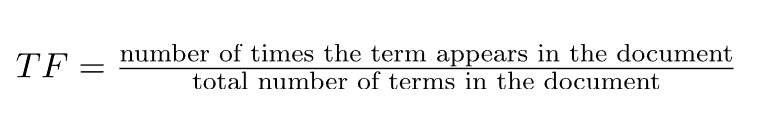
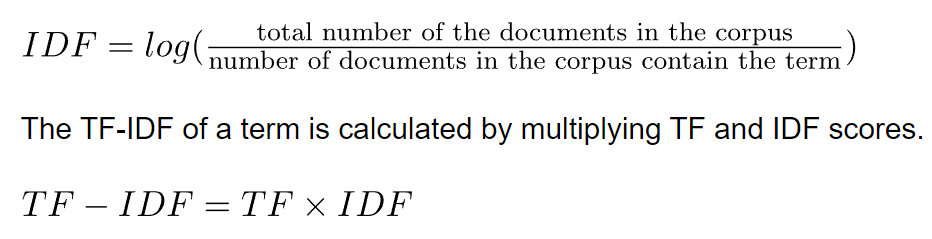

Dalam pengelompokan kata ini saya menggunakan library dari scikit-learn yaitu TfidfVectorizer, prosesnya sebagai berikut:
1. Import library
2. Deklarasikan library
3. Lakukan transformasi data yang sudah dilakukan pre processing
4. Data hasil transformasi dilakukkan konversi menjadi array setiap katanya
5. Selanjutnya dilakukan get_feature_names_out untuk menampung nama setiap fitur yang dihasilkan
6. Hasil akhir data yang sudah dilakukan tf-idf menggunakan library akan dibentuk dalam tabel



In [43]:
tf_idf_model  = TfidfVectorizer()
tf_idf_vector = tf_idf_model.fit_transform(hasilpreproses['Text'])

In [44]:
tf_idf_array = tf_idf_vector.toarray()
print(tf_idf_array)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.25209491 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [45]:
words_set = tf_idf_model.get_feature_names_out()
print(words_set)

['abis' 'absurd' 'ace' ... 'yudhistira' 'yukkk' 'zaman']


In [16]:
df_tf_idf = pd.DataFrame(tf_idf_array, columns = words_set)
df_tf_idf

,abis,absurd,ace,adain,adekmu,agama,age,agenda,agk,air,...,yaudah,ye,yee,yg,yogyakarta,york,youtube,yudhistira,yukkk,zaman
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.252095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
128,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.156440,0.0,0.0,0.0,0.0,0.0,0.0
129,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
130,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.241846,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
import pickle
pickle.dump(tf_idf_model.vocabulary_,open('tf_idf.sav','wb'))

# SVM

In [70]:
from sklearn import svm
from sklearn.metrics import accuracy_score
# from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [71]:
y = data.Label

In [72]:
# split data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df_tf_idf,y,test_size=0.2,random_state=4)

In [80]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [81]:
X_pred = clf.predict(X_test)
X_pred

array([ 1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1])

In [82]:
accuracy_score(y_test, X_pred)

0.9259259259259259

In [83]:
pickle.dump(clf,open('model.sav','wb'))

In [86]:
# load the model from disk
saved_vocabulary = pickle.load(open("tf_idf.sav", 'rb'))
cvec_tfidf = TfidfVectorizer(vocabulary=saved_vocabulary)
loaded_model = pickle.load(open('model.sav', 'rb'))
tf = cvec_tfidf.fit_transform(["aku bisa"]).toarray()
result = loaded_model.predict(tf)
print(result)

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


### cek nilai akurasi

In [25]:
def akurasi(kernel) :
  test_size = [0.2,0.3,0.4]
  rs=[4,5]
  kernel = ['linear', 'poly', 'rbf']
  akurasi= []
  for i in range(len(test_size)):
    for e in range(len(kernel)) :
      for u in range(len(rs)):
        tt = []
        y = data.Label
        X_train,X_test,y_train,y_test = train_test_split(df_tf_idf,y,test_size=test_size[i],random_state=rs[u])
        clf = svm.SVC(kernel=kernel[e])
        clf.fit(X_train, y_train)
        X_pred = clf.predict(X_test)
        ak = accuracy_score(y_test, X_pred)
        tt.append(ak)
        tt.append(rs[u])
        tt.append(kernel[e])
        tt.append(test_size[i])
        akurasi.append(tt)
  return akurasi

In [26]:
akurasi = akurasi('linear')
akurasi

[[0.9259259259259259, 4, 'linear', 0.2],
 [0.8148148148148148, 5, 'linear', 0.2],
 [0.9259259259259259, 4, 'poly', 0.2],
 [0.8148148148148148, 5, 'poly', 0.2],
 [0.9259259259259259, 4, 'rbf', 0.2],
 [0.8148148148148148, 5, 'rbf', 0.2],
 [0.85, 4, 'linear', 0.3],
 [0.725, 5, 'linear', 0.3],
 [0.85, 4, 'poly', 0.3],
 [0.725, 5, 'poly', 0.3],
 [0.85, 4, 'rbf', 0.3],
 [0.725, 5, 'rbf', 0.3],
 [0.8679245283018868, 4, 'linear', 0.4],
 [0.7169811320754716, 5, 'linear', 0.4],
 [0.8490566037735849, 4, 'poly', 0.4],
 [0.7169811320754716, 5, 'poly', 0.4],
 [0.8490566037735849, 4, 'rbf', 0.4],
 [0.7169811320754716, 5, 'rbf', 0.4]]

In [27]:
akr = pd.DataFrame(akurasi, columns=['akurasi','random_state','kernel','test_size'])
akr

,akurasi,random_state,kernel,test_size
0,0.925926,4,linear,0.2
1,0.814815,5,linear,0.2
2,0.925926,4,poly,0.2
3,0.814815,5,poly,0.2
4,0.925926,4,rbf,0.2
5,0.814815,5,rbf,0.2
6,0.850000,4,linear,0.3
7,0.725000,5,linear,0.3
8,0.850000,4,poly,0.3
9,0.725000,5,poly,0.3


In [28]:
hasil = 0
data_ke = []
for i in range(len(akurasi)):
  if (hasil < akurasi[i][0]) or (hasil == akurasi[i][0]):
    hasil = akurasi[i][0]
    data_ke.append(akurasi[i])
print('hasil akurasi terbesar = ',hasil)
print('masuk dalam data = ',data_ke)

hasil akurasi terbesar =  0.9259259259259259
masuk dalam data =  [[0.9259259259259259, 4, 'linear', 0.2], [0.9259259259259259, 4, 'poly', 0.2], [0.9259259259259259, 4, 'rbf', 0.2]]


## Evaluasi

In [29]:
print(classification_report(y_test, X_pred))

              precision    recall  f1-score   support

          -1       1.00      0.50      0.67         4
           1       0.92      1.00      0.96        23

    accuracy                           0.93        27
   macro avg       0.96      0.75      0.81        27
weighted avg       0.93      0.93      0.92        27

